In [3]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sms
from scipy.stats import pearsonr

# Clostridium 

In [4]:
clostridium_df = pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Clostridium")
clostridium_df.head()

,Unnamed: 0,Sample ID,TP_r1,TP_r2,TP_avg,cp_inhibitionZone,cp_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
0,0,p0101-M1,412.005,>420.000,412.0050,0,0.0,PI533876,Caudatum,Nigeria,KA 12 Janjari,R,1.0,0
1,1,p0101-M2,320.088,325.318,322.7030,0,0.0,PI656116,NaN,Mali,SC 1506,R,1.0,0
2,2,p0102-M1,>420.000,>420.000,420.0000,0,0.0,PI576350,Kafir-Caudatum,USA,SAP-417,R,1.0,4
3,3,p0102-M2,>420.000,>420.000,420.0000,0,0.0,PI641849,NaN,NaN,WACONIA,R,1.0,22.7
4,4,p0103-M2,413.011,414.75,413.8805,0,0.0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0.0,ND


[Text(0, 0.5, ' Total phenolic [GAE/g]'), Text(0.5, 0, 'Inhibition zone (mm)')]

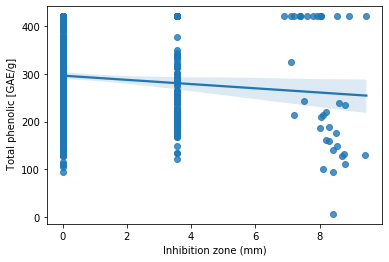

In [5]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
cp = sns.regplot(x="cp_AMA", y="TP_avg", data=clostridium_df)
cp.set(xlabel= "Inhibition zone (mm)", ylabel=" Total phenolic [GAE/g]")

In [6]:
clostridium_df_filtered = clostridium_df.loc[:,["Tannins","Testa","cp_AMA", "PI"]]
clostridium_df_filtered.dropna(inplace=True)
clostridium_df_filtered.Tannins.replace("ND", 0, inplace=True)
clostridium_df_filtered["Testa"] = clostridium_df_filtered.Testa.astype(int)
clostridium_df_filtered.head()

,Tannins,Testa,cp_AMA,PI
0,0.0,1,0.0,PI533876
1,0.0,1,0.0,PI656116
2,4.0,1,0.0,PI576350
3,22.7,1,0.0,PI641849
4,0.0,0,0.0,PI533877


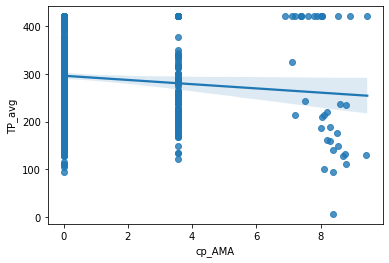

In [7]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.regplot(x="cp_AMA", y="TP_avg", data=clostridium_df)

[Text(0, 0.5, 'Tannins [g of CE/kg]'), Text(0.5, 0, 'Testa')]

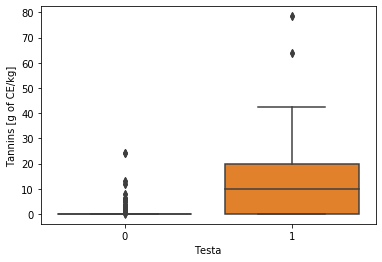

In [8]:
Cpbox=sns.boxplot(x="Testa", y="Tannins", data=clostridium_df_filtered)
Cpbox.set(xlabel = "Testa", ylabel="Tannins [g of CE/kg]")

[Text(0, 0.5, 'Tannins [g of CE/kg]'), Text(0.5, 0, 'Inhibition zone (mm)')]

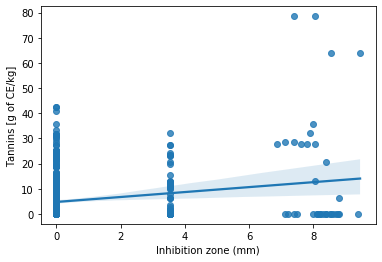

In [9]:
Cpscat = sns.regplot(x="cp_AMA", y="Tannins", data=clostridium_df_filtered)
Cpscat.set(xlabel = "Inhibition zone (mm)", ylabel="Tannins [g of CE/kg]")


[Text(0, 0.5, 'Inhibition zone(mm)')]

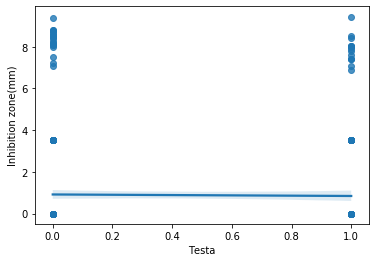

In [10]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

testa_am=sns.regplot(x="Testa", y="cp_AMA", data=clostridium_df)
testa_am.set(ylabel="Inhibition zone(mm)")


In [11]:
ama = list(clostridium_df_filtered["cp_AMA"])
new_ama = []
for i in ama:
    if i < 1:
        new_ama.append("none")
    if ((i >3.5) and (i<4)):
        new_ama.append("weak")
    if (i>=4):
        new_ama.append("strong")
clostridium_df_filtered["AMA"] = new_ama
set(new_ama)

{'none', 'strong', 'weak'}

In [12]:
pis = ["PI329440","PI533869","PI533871","PI533948",
       "PI533979","PI534115","PI595739","PI597957",
       "PI656024","PI656059","PI656088","PI656091",
       "PI656112"]

In [13]:
pi_values = clostridium_df_filtered[clostridium_df_filtered.PI.isin(pis)].sort_values(by="PI")
print(pi_values.PI.unique())

['PI329440' 'PI533869' 'PI533871' 'PI533948' 'PI533979' 'PI534115'
 'PI595739' 'PI597957' 'PI656024' 'PI656059' 'PI656088' 'PI656091'
 'PI656112']


In [14]:
rep_agreement = clostridium_df_filtered.groupby("PI").min()
rep_agreement = rep_agreement[rep_agreement["cp_AMA"] != 0]
print(rep_agreement)
rep_agreement= rep_agreement["cp_AMA"].index
set(rep_agreement).intersection(set(pis))

          Tannins  Testa  cp_AMA     AMA
PI                                      
PI533762      6.3      1    3.55    weak
PI533869      0.0      0    8.10  strong
PI533871      0.0      0    8.10  strong
PI533940      6.4      0    3.55  strong
PI533948      0.0      0    8.55  strong
PI533979      0.0      0    3.55  strong
PI534114      9.9      1    3.55    weak
PI534115      0.0      0    8.00  strong
PI542406     28.5      1    7.10  strong
PI566819     23.5      1    3.55    weak
PI576376      0.4      0    3.55    weak
PI576393     20.8      1    3.55  strong
PI595739      0.0      0    9.40  strong
PI595740     12.7      1    3.55    weak
PI597945      0.0      0    3.55    weak
PI597957      0.0      0    3.55  strong
PI598069      0.0      1    3.55    weak
PI641836     32.1      1    3.55  strong
PI642998     78.5      1    7.40  strong
PI655980      0.0      1    7.40  strong
PI655983     27.7      1    7.60  strong
PI655995     63.8      1    8.53  strong
PI656003     19.

{'PI533869',
 'PI533871',
 'PI533948',
 'PI533979',
 'PI534115',
 'PI595739',
 'PI597957',
 'PI656088',
 'PI656112'}

In [15]:
pd.crosstab(np.array(clostridium_df_filtered.Testa), 
            [np.array(clostridium_df_filtered.AMA)])

col_0,none,strong,weak
row_0,,,
0,299,19,51
1,227,15,32


# Salmonella

In [16]:
salmonella_df=pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Salmonella")
salmonella_df.head()

,Unnamed: 0,Sample ID,TP_r1,TP_r2,TP_avg,se_Inhibition,se_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
0,0,p0101-M2,320.088,325.318,322.7030,0,0,PI656116,NaN,Mali,SC 1506,R,1.0,0
1,1,p0102-M2,>420.000,>420.000,420.0000,0,0,PI641849,NaN,NaN,WACONIA,R,1.0,22.7
2,2,p0103-M2,413.011,414.75,413.8805,0,0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0.0,ND
3,3,p0104-M1,319.039,336.31,327.6745,0,0,PI534088,Caudatum,Nigeria,ZA 6,NaN,0.0,0
4,4,p0105-M1,>420.000,>420.000,420.0000,0,0,PI595741,Guinea,Senegal,SAP-134,W,1.0,ND


In [17]:
salmonella_df.dropna(inplace=True)
salmonella_df["Testa"] = salmonella_df.Testa.astype(int)
salmonella_df.Tannins.replace("ND", 0, inplace=True)
salmonella_df.head()

,Unnamed: 0,Sample ID,TP_r1,TP_r2,TP_avg,se_Inhibition,se_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
2,2,p0103-M2,413.011,414.75,413.8805,0,0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0,0.0
4,4,p0105-M1,>420.000,>420.000,420.0000,0,0,PI595741,Guinea,Senegal,SAP-134,W,1,0.0
5,5,p0105-M2,331.87,320.792,326.3310,0,0,PI534096,Guinea,Kenya,SO 85,R,0,0.0
6,6,p0106-M1,206.301,194.202,200.2515,0,0,PI534096,Guinea,Kenya,SO 85,R,0,0.0
7,7,p0107-M1,399.504,399.375,399.4395,0,0,PI534047,Caudatum,Sudan,450 Bori Light Brown,R,1,0.0


In [18]:
pd.crosstab(np.array(salmonella_df.Testa), 
            [np.array(salmonella_df.se_AMA)])

col_0,0,1
row_0,,
0,172,10
1,73,123


[Text(0, 0.5, ' Total phenolic [GAE/g]'),
 Text(0.5, 0, 'Antimicrobial activity')]

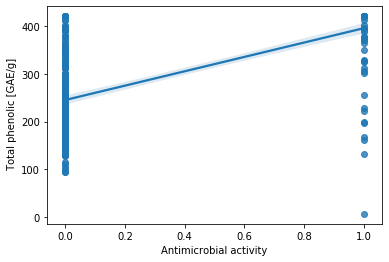

In [19]:
se = sns.regplot(x="se_AMA", y="TP_avg", data=salmonella_df)
se.set(xlabel= "Antimicrobial activity", ylabel=" Total phenolic [GAE/g]")
# pearson's r for total phenol/ama = 0.698297

[Text(0, 0.5, 'Tannins g of [CE/kg]'), Text(0.5, 0, 'Antimicrobial activity')]

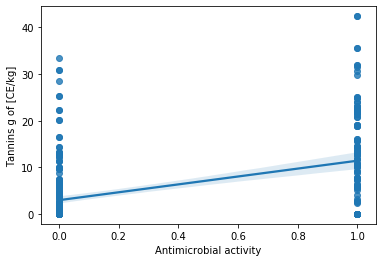

In [20]:
se_tan = sns.regplot(x="se_AMA", y ="Tannins", data=salmonella_df)
se_tan.set(xlabel= "Antimicrobial activity", ylabel="Tannins g of [CE/kg]")

In [21]:
salmonella_df.corr(method="pearson")

,Unnamed: 0,TP_avg,se_AMA,Testa,Tannins
Unnamed: 0,1.000000,0.716017,0.846477,0.424560,0.380436
TP_avg,0.716017,1.000000,0.703309,0.537081,0.404649
se_AMA,0.846477,0.703309,1.000000,0.599116,0.455848
Testa,0.424560,0.537081,0.599116,1.000000,0.548876
Tannins,0.380436,0.404649,0.455848,0.548876,1.000000


/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


[Text(17.200000000000003, 0.5, 'Tannins g of [CE/kg]'),
 Text(0.5, 17.200000000000003, 'Antimicrobial activity')]

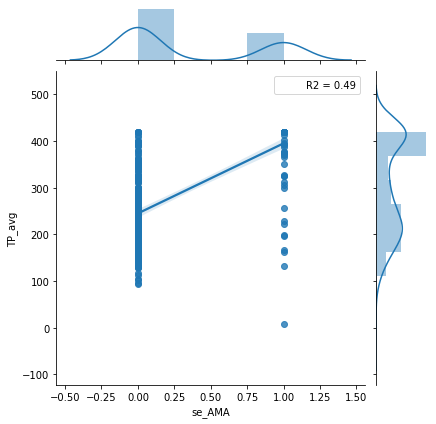

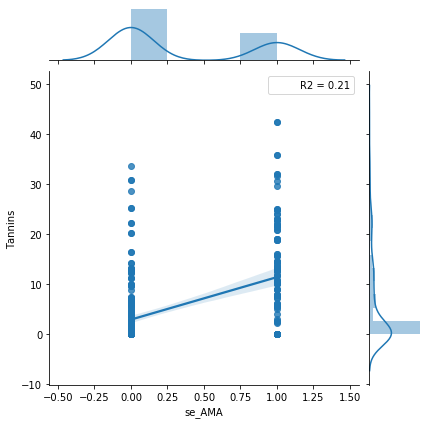

In [22]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(x="se_AMA", y="TP_avg", data=salmonella_df, kind="reg", stat_func=R2)
se.set(xlabel= "Antimicrobial activity", ylabel=" Total phenolic [GAE/g]")
sns.jointplot(x="se_AMA", y="Tannins", data=salmonella_df, kind="reg", stat_func=R2)
se_tan.set(xlabel= "Antimicrobial activity", ylabel="Tannins g of [CE/kg]")

# Compositional data

In [25]:
nir_raw = pd.read_excel("../data/Supplemental_F1.xlsx", index_col=0)
columns = ["_".join(i.split()) for i in list(nir_raw.columns)]
nir_raw.columns = columns
nir_raw.head()

,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Rep,Sample_ID,cp_AMA,sal_AMA
0,PI533876,KA 12 Janjari,FL17-SAP-M1-p0101,4.92,0.21,88.89,54.44,13.63,10.96,1.42,...,4.51,9.50,-0.17,0,69.89,19.95,1.0,FL17-SAP-M1-p0101,0.0,1.0
1,PI576350,SAP-417,FL17-SAP-M1-p0102,7.24,2.28,83.41,51.83,15.86,9.72,-0.80,...,6.14,12.84,-0.13,0,61.98,23.58,1.0,FL17-SAP-M1-p0102,0.0,1.0
2,PI595741,SAP-134,FL17-SAP-M1-p0105,3.28,3.50,89.68,61.26,10.80,7.92,-1.98,...,5.12,10.42,-0.13,0,72.12,15.92,1.0,NaN,0.0,NaN
3,PI534096,SO 85,FL17-SAP-M1-p0106,5.55,2.37,85.91,52.52,13.70,10.40,1.19,...,6.08,13.63,-0.19,0,66.76,22.00,1.0,NaN,0.0,NaN
4,PI534047,450 Bori Light Brown,FL17-SAP-M1-p0107,5.64,1.51,86.53,56.83,12.54,10.57,1.02,...,5.97,12.31,-0.23,0,67.67,20.49,1.0,FL17-SAP-M1-p0107,0.0,1.0


In [34]:
numeric_columns = nir_raw.columns[3:len(nir_raw.columns)-4]

In [35]:
fl17_ama = pd.read_excel("../data/Supplemental_F1.xlsx", index_col=0)
print(fl17_ama.shape)
fl17_ama.head()

(776, 44)


,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Rep,Sample ID,cp_AMA,sal_AMA
0,PI533876,KA 12 Janjari,FL17-SAP-M1-p0101,4.92,0.21,88.89,54.44,13.63,10.96,1.42,...,4.51,9.50,-0.17,0,69.89,19.95,1.0,FL17-SAP-M1-p0101,0.0,1.0
1,PI576350,SAP-417,FL17-SAP-M1-p0102,7.24,2.28,83.41,51.83,15.86,9.72,-0.80,...,6.14,12.84,-0.13,0,61.98,23.58,1.0,FL17-SAP-M1-p0102,0.0,1.0
2,PI595741,SAP-134,FL17-SAP-M1-p0105,3.28,3.50,89.68,61.26,10.80,7.92,-1.98,...,5.12,10.42,-0.13,0,72.12,15.92,1.0,NaN,0.0,NaN
3,PI534096,SO 85,FL17-SAP-M1-p0106,5.55,2.37,85.91,52.52,13.70,10.40,1.19,...,6.08,13.63,-0.19,0,66.76,22.00,1.0,NaN,0.0,NaN
4,PI534047,450 Bori Light Brown,FL17-SAP-M1-p0107,5.64,1.51,86.53,56.83,12.54,10.57,1.02,...,5.97,12.31,-0.23,0,67.67,20.49,1.0,FL17-SAP-M1-p0107,0.0,1.0


/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


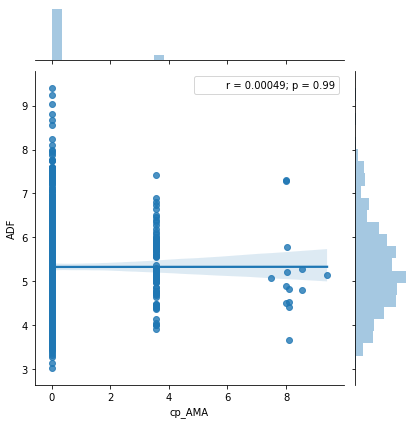

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


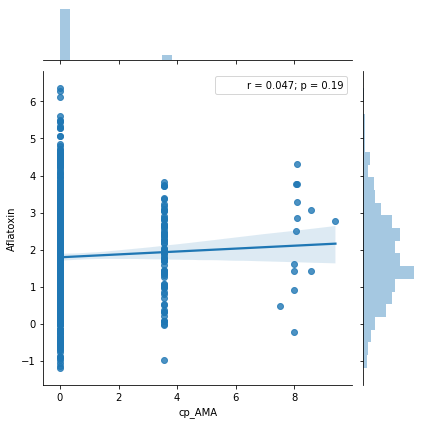

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


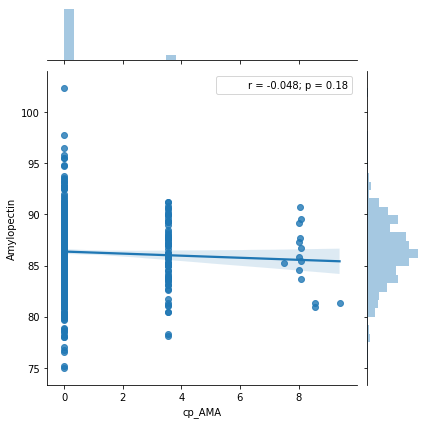

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


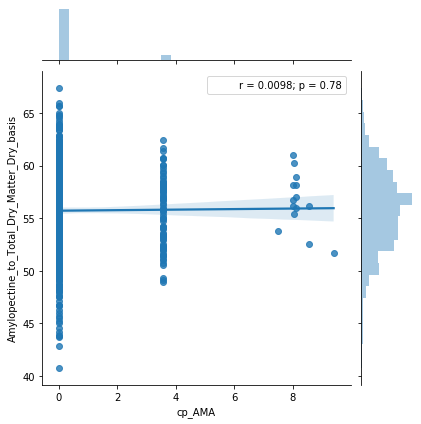

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


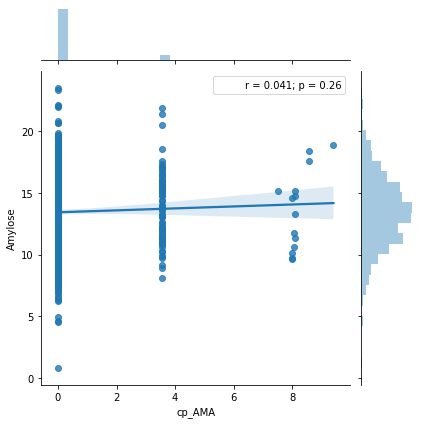

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


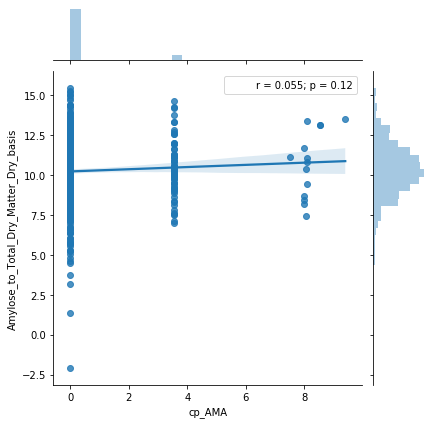

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


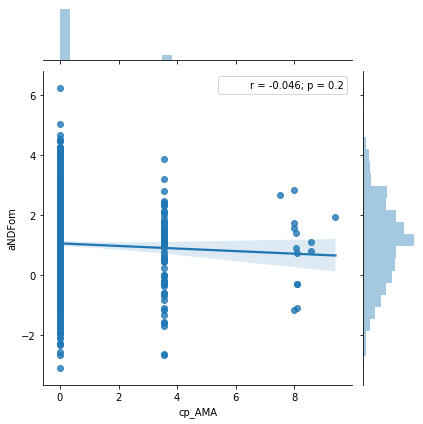

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


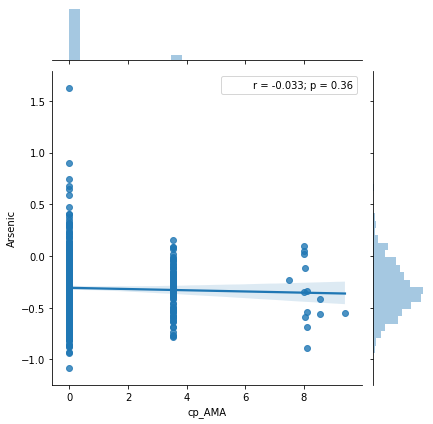

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


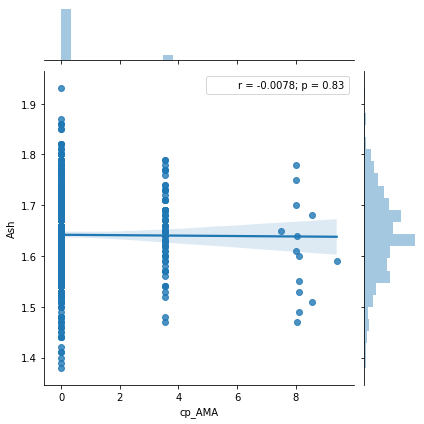

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


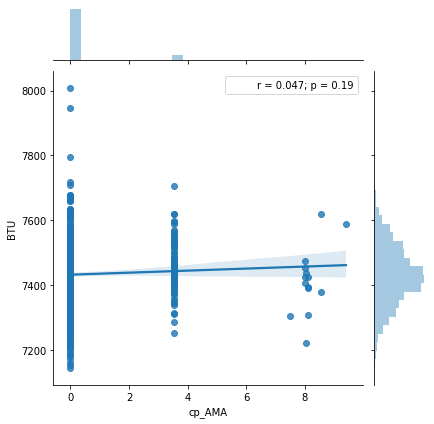

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


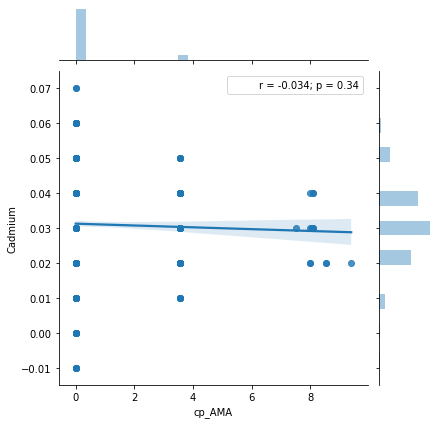

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


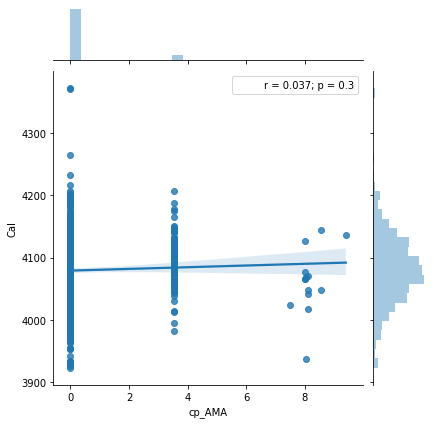

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


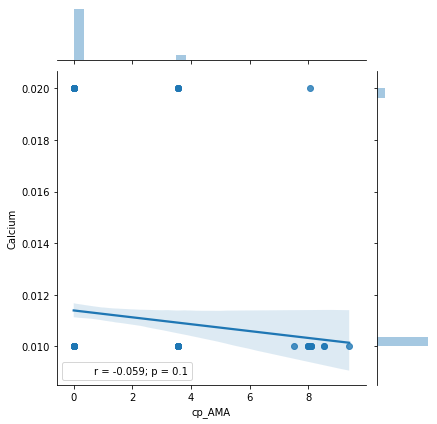

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


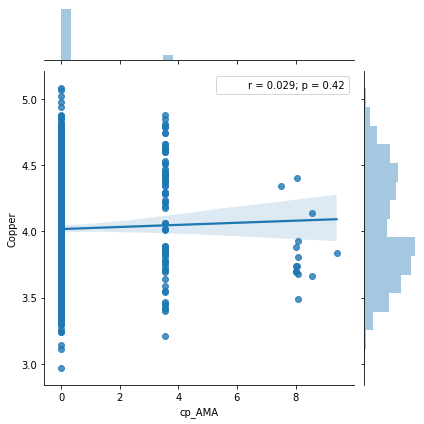

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


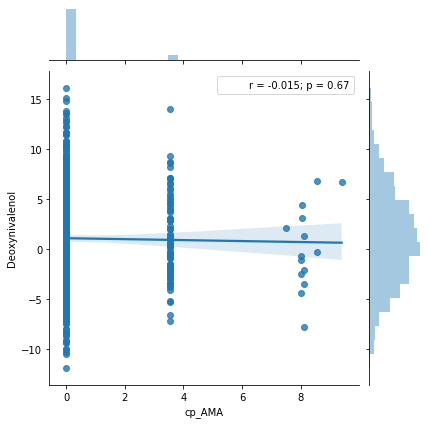

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


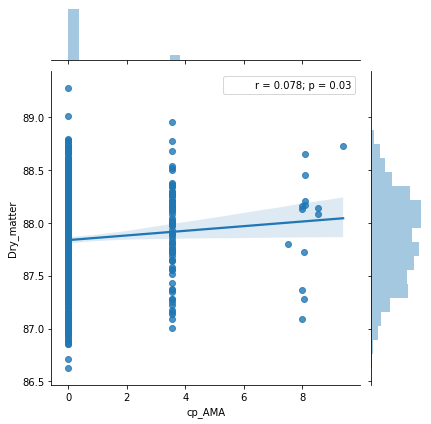

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


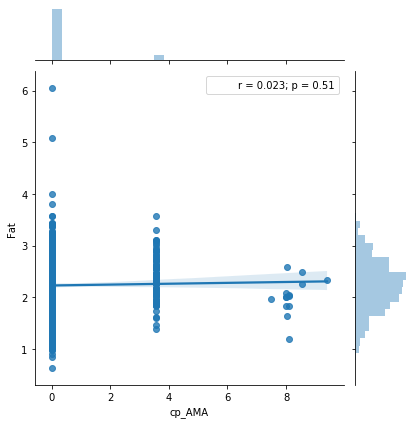

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


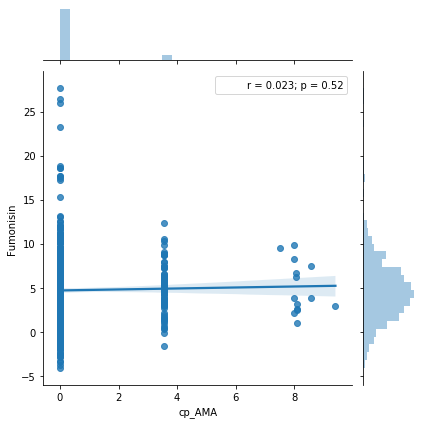

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


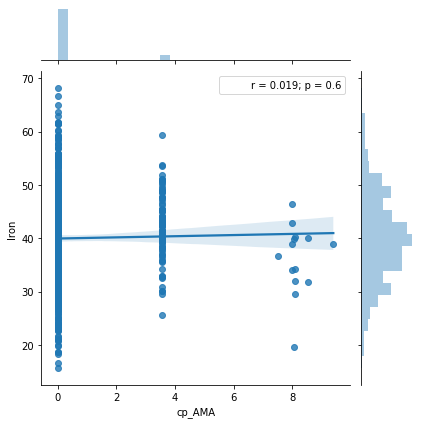

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


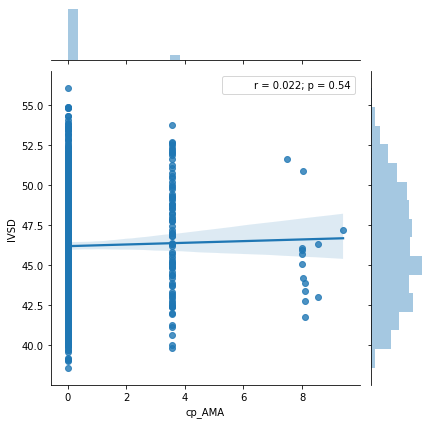

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


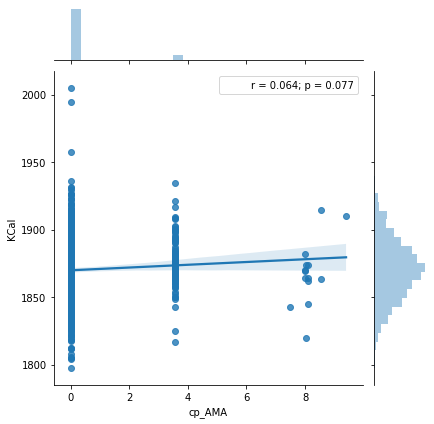

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


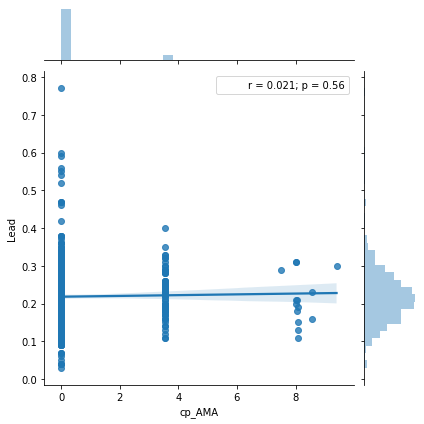

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


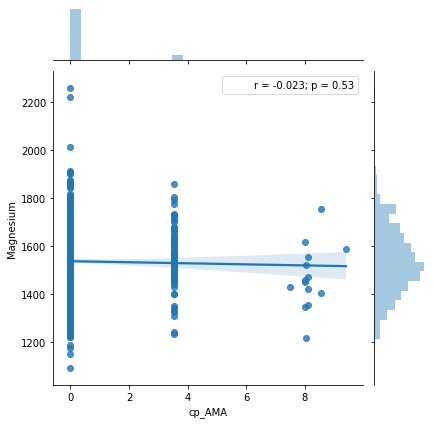

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


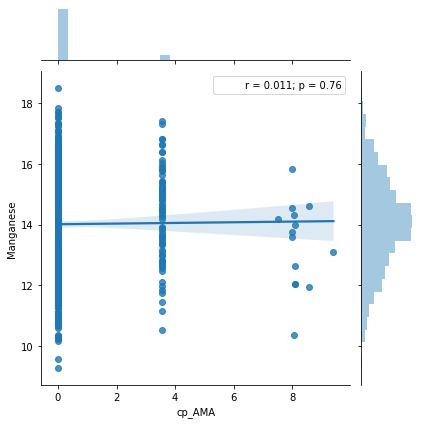

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


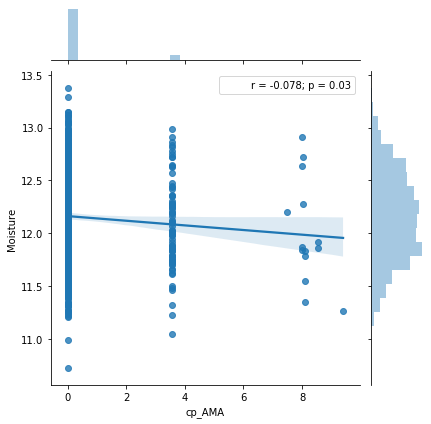

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


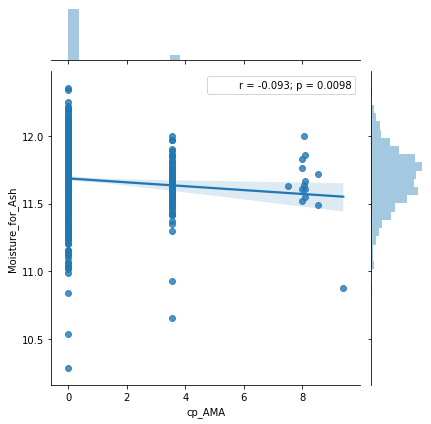

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


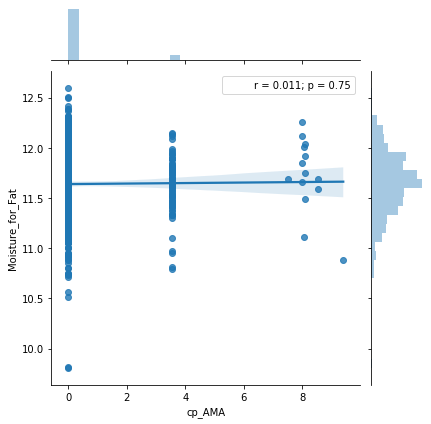

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


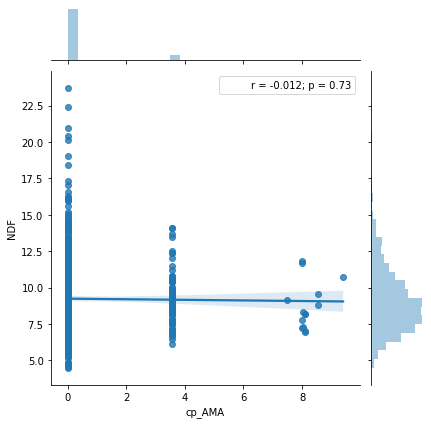

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


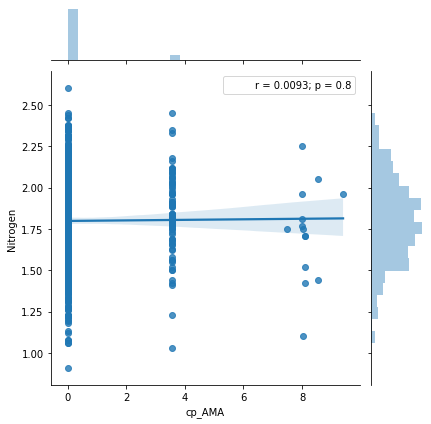

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


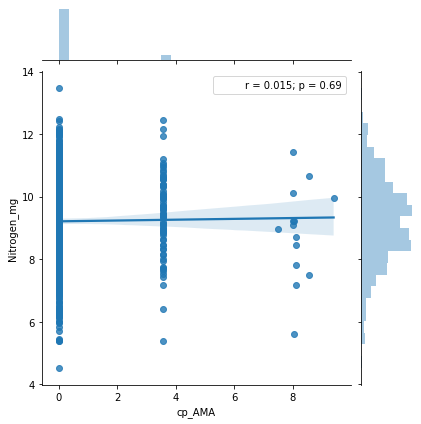

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


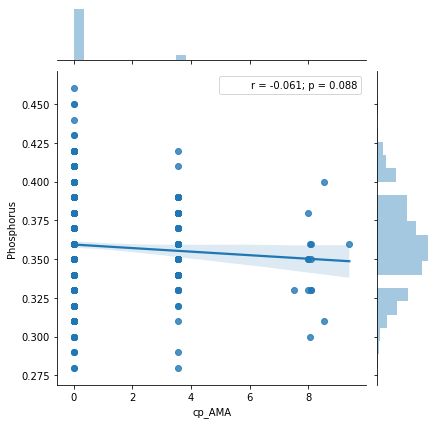

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


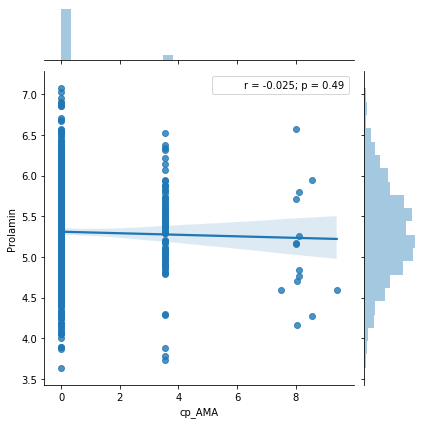

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


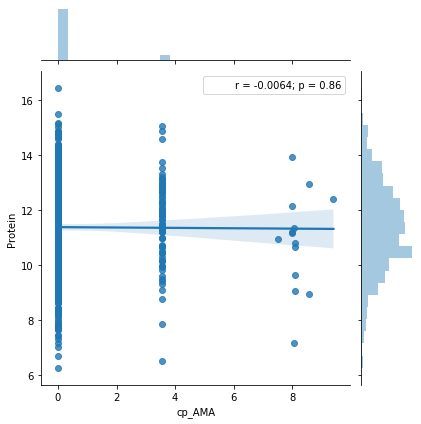

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


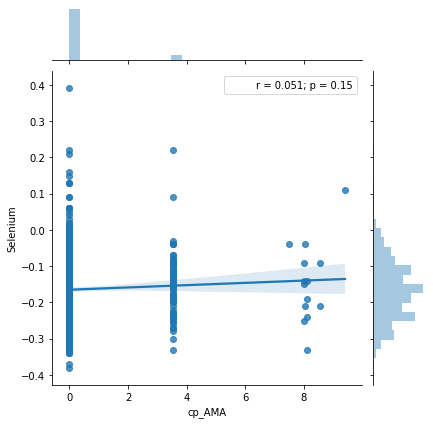

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


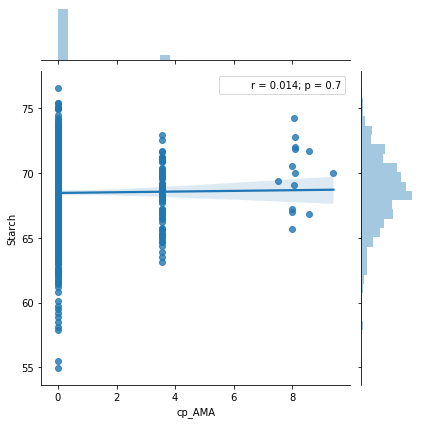

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


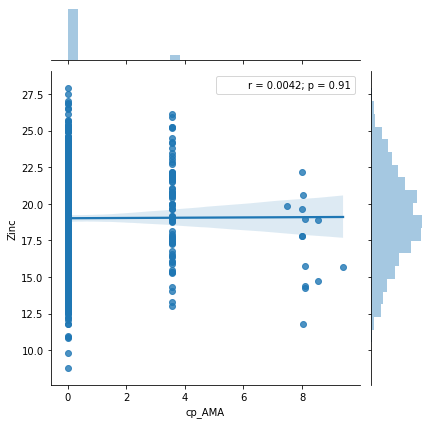

In [36]:
def r(x, y):
    return stats.pearsonr(x, y)

p_values = []

for i in list(numeric_columns.values):
    if i not in ["Sodium"]:
        sns.jointplot(x="cp_AMA", 
                      y=i, 
                      data=fl17_ama, 
                      kind="reg", 
                      marginal_kws=dict(kde=False), 
                      stat_func=r)
        p_values.append(r(fl17_ama.cp_AMA, fl17_ama.loc[:,i]))
        plt.show()

In [37]:
corr_pval = pd.DataFrame(p_values, columns=["r","pvalue"])
corr_pval = corr_pval.drop(34) # trait 34 was removed because all NIR measurments = 0
corr_pval.head()

,r,pvalue
0,0.000491,0.989115
1,0.046760,0.193191
2,-0.048050,0.181180
3,0.009845,0.784226
4,0.040592,0.258732


In [38]:
sms.stats.multipletests(corr_pval["pvalue"], alpha=0.05, method="fdr_bh")

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([0.98911538, 0.57393686, 0.57393686, 0.89810966, 0.69658671,
        0.57393686, 0.57393686, 0.77923234, 0.90683086, 0.57393686,
        0.77923234, 0.75185533, 0.57393686, 0.85232856, 0.89810966,
        0.35086115, 0.85232856, 0.85232856, 0.87174183, 0.85232856,
        0.57393686, 0.85232856, 0.85232856, 0.89810966, 0.35086115,
        0.34382566, 0.89810966, 0.89810966, 0.89810966, 0.89810966,
        0.57393686, 0.85232856, 0.90977954, 0.57393686, 0.93298071]),
 0.0014644493428053185,
 0.0014285714285714286)